In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
from numpy import ndarray

def load_picture(image_path: str) -> ndarray:
    img = cv.imread(image_path)
    plt.imshow(img)
    return img

1) Kraken only runs on Linux or Mac OS X. Windows is not supported. https://github.com/mittagessen/kraken

Можно обучать: https://kraken.re/main/training.html
"И сегментация, процесс поиска линий и областей на изображении страницы, и распознавание, преобразование изображений линий в текст могут быть обучены в Kraken."

2) Calamari
https://github.com/Calamari-OCR

Нет моделей для русского языка. На основании результатов распознавания моделями, адаптированными к русскому языку, решено иноязычные модели не пробовать.

Можно обучить на своей выборке: https://calamari-ocr.readthedocs.io/en/latest/doc.command-line-usage.html#calamari-train

Архитектура не указана.

3) Ocropy
https://github.com/ocropus-archive/DUP-ocropy

Cyrillic model from https://github.com/jze/ocropus-model_cyrillic/ 
Эта модель обучена на печатном тексте (учебник "Введение в археологию").


Run on terminal:

python ocropus-nlbin <path to picture> -o book

: book is dir for results

python ocropus-gpageseg 'book/????.bin.png'

: Разрезает по строкам или фрагментам.

python ocropus-rpred -Q 4 -m models/cyrillic.pyrnn.gz 'book/????/??????.bin.png'

: Должен распознавать, но падает при загрузке модели. С моделями на других языках так же.

: Traceback (most recent call last):

:   File "ocropus-rpred", line 120, in <module>

:     network = ocrolib.load_object(args.model,verbose=1)

:   File "C:\Users\User\jupyter\ocropy_venv_p2.7\DUP-ocropy\ocrolib\common.py", line 445, in load_object

:     return unpickler.load()

: EOFError

python ocropus-hocr 'book/????.bin.png' -o ersch.html

: should generate HTML output

Если не удастся использовать в качестве распознавателя, можно - для фрагментирования.
Пример работы первых двух команд для изображения test-2 - в директории example_ocropy_frag

5) Transkribus

Можно работать через сайт: https://app.transkribus.org

через клиента на Python (в который 2 года коммитов не было): https://github.com/Transkribus/TranskribusPyClient

через клиента на Java (который поддерживается): https://gitlab.com/readcoop/transkribus/TranskribusClient


Ниже пример эксперимента. Если в документе несколько областей текста, то пытается их выделить и распознавать в каждой области - это посмотреть так, чтобы были видны границы областей, можно только на сайте.


Дообучать на сайте: https://help.transkribus.org/model-setup-and-training


5.1) PyLaia - open-source - предоставляет средства для обучения моделей. Для простого эксперимента отсылает на сайт Transkribus.

Архитектура модели основана на книге "Are Multidimensional Recurrent Layers Really Necessary for Handwritten Text Recognition?" (2017) by J. Puigcerver.

https://github.com/jpuigcerver/PyLaia

Крестьянинъ и Завыяхови
Ивлой Игатова Полов
просина взыменый
иднодеревеща своего 7г
колму Мательева Сур-
7
жикова 8мублей
пользованы усадедной
миксностью въ валес
г 10 колдумнных
сажени.


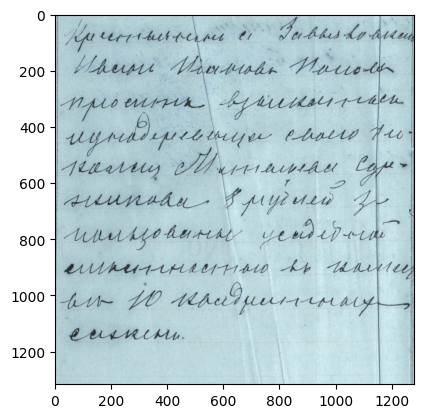

In [12]:
img = load_picture('test_pictures\\test-2-soderganie.jpg')

with open('transkribus-texts\\test-2-soderganie.txt', encoding='utf-8') as file:
    for line in file:
        print(line.strip())

6) PaddleOCR
Выдаёт координаты вершин 4-угольника, содержащего слово, распознанное внутри него. Упорядочивает по высоте - 2-й координате - 1-й точки (поэтому во второй строке примера с печатным текстом "бессонный" раньше, чем "во мрак"). В рукописном тексте распознать не удалось ничего. Латинские буквы находит потому, что они заданы в алфавите модели. Попытка убрать их из алфавита приводит к ошибке (list index out of range). Если обучать свою модель, то можно самостоятельно задать алфавит: например, включить в него буквосочетания.

Как дообучать: https://github.com/PaddlePaddle/PaddleOCR/blob/release/2.6/doc/doc_en/recognition_en.md

In [2]:
from paddleocr import PaddleOCR

# Инициализация PaddleOCR с поддержкой русского языка
ocr = PaddleOCR(lang='ru')

def recognize_paddleocr(image_path: str):
    # Загрузка изображения
    img = load_picture(image_path)

    # Распознавание текста
    result = ocr.ocr(img)

    # Вывод результатов
    print("\n")
    for line in result:
        for record in line:
            print(record)

[2024/10/07 21:47:08] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\User/.paddleocr/whl\\det\\ml\\Multilingual_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\User/.paddleocr/whl\\rec\\cyrillic\\cyrillic_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 

[2024/10/07 21:47:13] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2024/10/07 21:47:14] ppocr DEBUG: dt_boxes num : 42, elapsed : 0.908958911895752
[2024/10/07 21:47:15] ppocr DEBUG: rec_res num  : 42, elapsed : 0.9684324264526367


[[[64.0, 43.0], [187.0, 33.0], [196.0, 143.0], [73.0, 153.0]], ('N.', 0.6239678859710693)]
[[[691.0, 83.0], [737.0, 83.0], [737.0, 122.0], [691.0, 122.0]], ('Co.', 0.6369269490242004)]
[[[594.0, 313.0], [769.0, 313.0], [769.0, 389.0], [594.0, 389.0]], ('ца', 0.7497174739837646)]
[[[1171.0, 319.0], [1283.0, 324.0], [1281.0, 368.0], [1169.0, 362.0]], ('с', 0.9317976236343384)]
[[[1148.0, 437.0], [1357.0, 444.0], [1354.0, 518.0], [1145.0, 510.0]], ('uuy.', 0.563585638999939)]
[[[1190.0, 530.0], [1365.0, 530.0], [1365.0, 665.0], [1190.0, 665.0]], ('C', 0.8375120759010315)]
[[[58.0, 540.0], [471.0, 543.0], [470.0, 611.0], [57.0, 607.0]], ('U Ouiihs', 0.5934634208679199)]
[[[44.0, 657.0], [301.0, 64

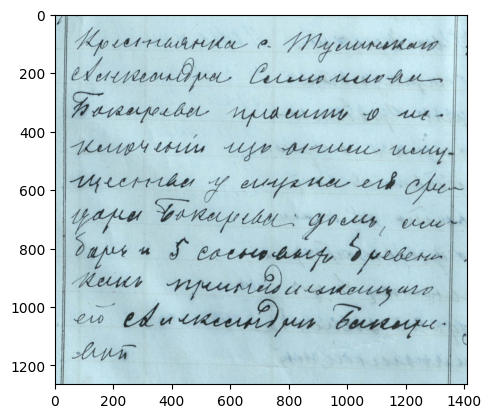

In [3]:
recognize_paddleocr('test_pictures\\test-9-soderganie-2.jpg')

[2024/10/07 21:37:10] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2024/10/07 21:37:11] ppocr DEBUG: dt_boxes num : 51, elapsed : 0.8000516891479492
[2024/10/07 21:37:11] ppocr DEBUG: rec_res num  : 51, elapsed : 0.8106188774108887


[[[552.0, 631.0], [867.0, 642.0], [864.0, 736.0], [549.0, 726.0]], ('Bесна', 0.9163292646408081)]
[[[888.0, 662.0], [968.0, 647.0], [984.0, 728.0], [905.0, 743.0]], ('и', 0.8708550333976746)]
[[[1001.0, 653.0], [1241.0, 663.0], [1238.0, 745.0], [997.0, 734.0]], ('Hoч.', 0.7913724184036255)]
[[[1277.0, 657.0], [1725.0, 667.0], [1722.0, 770.0], [1275.0, 760.0]], ('покрыли', 0.9976314902305603)]
[[[1750.0, 671.0], [1975.0, 671.0], [1975.0, 770.0], [1750.0, 770.0]], ('дол', 0.980492115020752)]
[[[559.0, 869.0], [844.0, 869.0], [844.0, 998.0], [559.0, 998.0]], ('Душа', 0.9117788076400757)]
[[[883.0, 872.0], [1189.0, 887.0], [1184.0, 990.0], [878.0, 975.0]], ('бежит', 0.9992910623550415)]
[[[1660.0

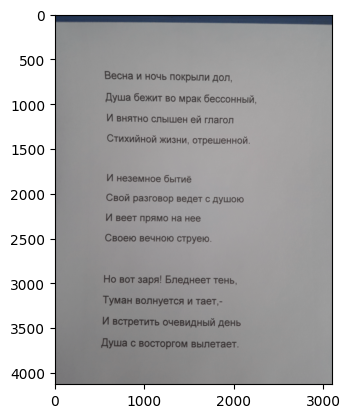

In [9]:
recognize_paddleocr('test_pictures\\printed.jpg')

7) Tesseract OCR

   Запустим на ubuntu, русский язык есть.

   Tesseract4 распознаёт строки текста, Tesseract3 - образцы символов.

  https://github.com/tesseract-ocr/tesseract

8) SimpleHTR https://github.com/githubharald/SimpleHTR/

   Модели только для английского языка. Можно попробовать распознавание отдельного слова в браузере (https://githubharald.github.io/text_reader.html) - пытается найти английские буквы.

   Предоставляет API для обучения модели на собственной обучающей выборке. Архитектура модели: 5 слоев CNN, 2 слоя RNN (LSTM) и слой CTC

9) Handwritten Text Recognition (HTR) System  https://github.com/arthurflor23/handwritten-text-recognition

Реализована с использованием TensorFlow 2.x, обучена на иноязычных текстах. Эта модель нейронной сети распознает текст, содержащийся в изображениях сегментированных текстовых строк. Есть ссылки на статьи разработчиков в журналах (2020-2024).

Предоставляет API для обучения: https://github.com/arthurflor23/handwritten-text-recognition/blob/master/src/tutorial.ipynb

10) CTCModel  https://github.com/cyprienruffino/CTCModel

Реализация модели с использованием Keras. Можно скачать и обучить.

11. mmocr (openmmlab) https://mmocr.readthedocs.io/en/dev-1.x/
    Выделяет слова, буквы пытается распознать латинские. Упорядочивает распознанные слова по высоте. Подробнее визуализацию распознавания можно посмотреть в директории mmocr_results.
    Можно обучать на своих данных.

In [23]:
import matplotlib.pyplot as plt
from mmocr.apis import MMOCRInferencer


def recognize_mmocr(image_path: str):
    ocr = MMOCRInferencer(det='DBNet', rec='CRNN')
    result = ocr(image_path, return_vis=True, save_vis=True)
    
    text_res = result['predictions'][0]['rec_texts']
    text_res.reverse()
    print(text_res)

    plt.imshow(result['visualization'][0])
    plt.show()

Inference ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━   

['hyeaslarpioms', 'myereeresnares', 'o', 'edercivesurly', 'cecansor', 'a', 'gra', 'uenn', 's', 'r', 'porrepabes', 'mede', 'err', 'sups', 'uerwy', 'eau', 'amu', 'susiys', 'serki', 'wleaddi', 'soht', 'sevujanms', 'sontsupedues', 'lane', 'cup', 'g', 'i', 'excut', 'ha', 't', 'a', 't', 's', 'a', 't', 'sapt', 'eopednal', 's', 'scoesege', 'waups', 'u', 'mecur', 'meuried', 'vulsmollyy', 'yurds', 'sers', 'reareersed', 'borkeospees', 'e', 'dyens', 's', 'jant']


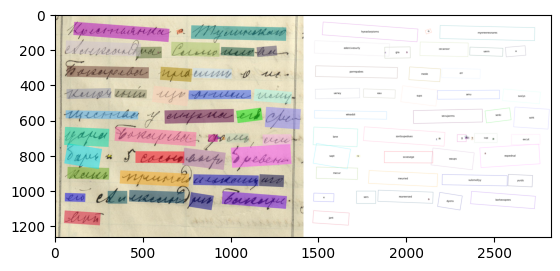

In [24]:
recognize_mmocr('test_pictures\\test-9-soderganie-2.jpg')

Inference ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━   

['ged', 'sn', 'opema', 'bpema', 'bpena', 'p', 'pochackabl', 'achoihehia', 'bliciy', 'i', 'hoxasania', 'chhteteieh', 'amhbia', 'codepkahier', 'sorwaes', 'hih', 'ho', 'non', 'kajo5bi', 'me', 'kik', 'upurobopob', 'gymaorany', 'pbuehie', 'psmeonia', 'hind', 'tmanin', 'poy', 'feon', 'sytroaia', 'ces', 'apoclob', 'iokasateilctbal', 'parye', 's', 'upurosopal', 'pemehih', 'prd', 'b', 'aneesreness', 'ailhreany', 'slycacescessets', 'verodfenem', 'edve', 'clu', 'hegreasy', 'clbuss', 'sruda', 'ecrr', 'une', 'udens', 'bar', 'mecrnpurrerohrsy', 'sipery', 'cojystl', 'veiioseseul', 'h', 'vub', 'eruerarvs', 'syerst', 'rs', 'eupnr', 'snoeripceerord', 'hre', 'ses', 'joloneda', 'vansdshrruma', 'auru', 'ceivo', 'premm', 'ohapn', 'cw', 's', 'sclerpthury', 'seeevut', 'seysequer', 'psa', 'sums', 'aoeyeh', 'm', 'sqmis', 'piriluel', 'clavasels', 'urolo', 'urco', 'spoole', 'nucssipeyaesebs', 'diheeres', 'fe', 'seypes', 'dorerdulen', 'soyal', 'crad', 'c', 'noyrewerky', 'sprude', 'c', 'srramau', 'ws', 'upeaaspers'

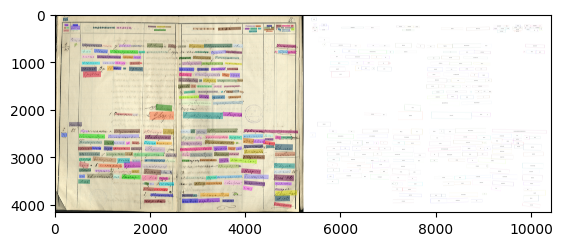

In [25]:
recognize_mmocr('test_pictures\\test-9.jpg')